# Entropy

Saleh Rezaeiravesh, saleh.rezaeiravesh@manchester.ac.uk
___

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('../core/')
from entropy import entropy

sys.path.append('../fromUQit_ts/')
from synDataGen_ts import syntheticData

## Shannon Entropy
"Average number of bits needed to optimally encode independent draws of the discrete variable I following probability distribution p(i)"


The entropy of a **discrete** random variable $X$ with a probability density (mass) function $p(x)$ is given by, 

$$
H(x) = -\sum_{x} p(x) \log_b(p(x))
$$

where, `b` can be $2$, $e$, etc. By default, we will use natural logarithmic function, i.e. $b=e$.

For a continuous RAV:

$$
H(x) = -\int f(x)\log_b f(x) d x
$$

## Methods of estimating Shannon entropy
1. Binning method 
2. Kernel Density Estimator (KDE) method
3. K-th Nearest Neighbourhood (KNN) method 

### K-th Nearest Neighbourhood (KNN) or KL method 
It is a **non-parametric** way of estimating entropy for **Continuous RVs** that is also more efficient than the binning method with minimal bias. It works based on the **$k$-th nearest neighbour (KNN)** algorithm. 

Reference:[Kraskov-Stogbauer-Grassberger, 2004](https://journals.aps.org/pre/abstract/10.1103/PhysRevE.69.066138)

Consider a set of samples $\{x_1,x_2,\cdots,x_n\}$ as $n$ realizations of a continuous RV $x$. 

$$
\hat{H}(X) = -\psi(k)+\psi(N)+\ln c_d +\frac{d}{n}\sum_{i=1}^n \ln \epsilon_i
$$

where
* $k$ is an integer; Nabove is calculated consindering the $k$-th nearest neigbour of $x_i$. Note that $k=1$ means resolving structures down to the smallest possible scale;
* $d$ is the dimensionality of $x$, 
* $N$ is the sample size,
* $\psi(\cdot)$ is the digamma function; $\psi(x) = \frac{d\ln \Gamma(x)}{d x}$,
* $c_d$ is the volume of the $d$-dimensional unit ball: $c_d=1$ for $L_\infty$ norm, and $c_d=\pi^{d/2}/\Gamma(1+d/2)/2^d$ for Euclidean ($L_2$) norm. 
* $\epsilon(i)$ is twice the distance between $x_i$ and its $k$-th neighbour.

## Validation of the estimators for random variables
Consider samples from random variables (not necessarily time series with definite statistical structure)

In particular, for a random variable with **iid samples** $x\sim \mathcal{N}(\mu,\sigma^2)$, the exact entropy can be found from a closed form expression:

$$
H_{exact}(x) = \frac{1}{2}\ln(2\pi e \sigma^2)
$$


In [2]:
# Generate samples from a Gaussian RV
np.random.seed(seed=201)
sig = 0.9     #exact sdev of the RV
x = np.random.randn(10000)*sig   #samples

#Exact entropy
H_ex = 0.5*np.log(2.*np.pi*np.e*sig**2.)

#Entropy - Binning method
H_bin = entropy(x).binning(nbin=20)

#Entropy - KDE method
H_kde = entropy(x).kde()

#Entropy - KL (KNN) method
H_kl = entropy(x).kl()

print("H - Exact:",H_ex)
print("H - Binning method:",H_bin)
print("H - KDE method:",H_kde)
print("H - KL method:",H_kl)

H - Exact: 1.3135780175468466
H - Binning method: 3.4035187370608075
H - KDE method: 1.3210734029948856
H - KL method: 1.3150377192274219


### Impact of number of bins on the esimtations from the Binning method
Clearly, the estimated entropy from the Binning method is extremely sensitive to the bin size:

In [3]:
binList=[5,10,15,20,30,40]
Hlist=[]
for nbin_ in binList:
    H_bin = entropy(x).binning(nbin=nbin_)
    Hlist.append(H_bin)

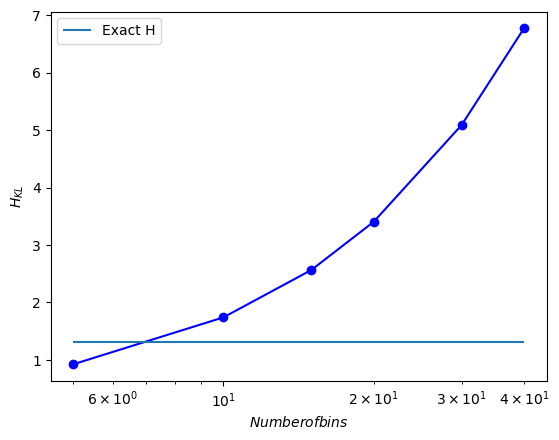

In [4]:
plt.semilogx(binList,Hlist,'-ob')
plt.hlines(H_ex,min(binList),max(binList),label='Exact H')
##plt.vlines(np.sqrt(len(x)),min(Hlist),max(Hlist),linestyles='dashed',color='red', label=r'$\sqrt{n}$')
plt.xlabel('$Number of bins$')
plt.ylabel('$H_{KL}$')
plt.legend(loc='best')
plt.show()

### Impact of $k$ in the KL estimator
Although KL entropy estimator is said to be non-parameteric, however, its estimations can rely on the choice for $k$. Generally speaking:

* **Small values of $k$**: more localized effects in the PDF are considered.
* **Large values of $k$**: more smoothened PDF, capturing general (non-local) effects. 

However, as compared to the Binning method, the sensitivity of the entropies by the KL estimator to $k$ can be lower:

See the following example that aims to experimentally demonstrate the impact of $k$ on the entropy estimated by the KL method:

In [5]:
kList=[1,2,5,10,15,20,30,40,50,75,100,150,200,300,400,500]
Hlist=[]
for k_ in kList:
    H_kl = entropy(x).kl(k=k_)
    Hlist.append(H_kl)

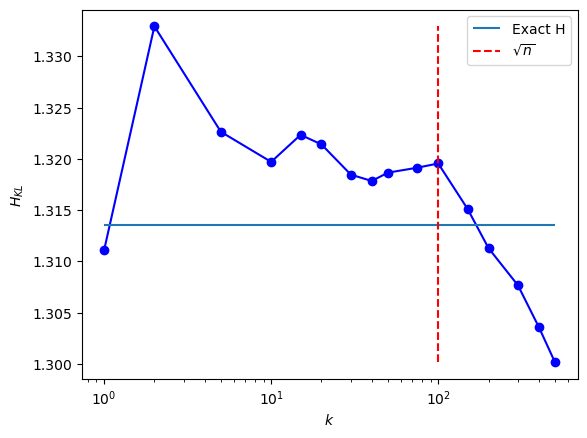

In [6]:
plt.semilogx(kList,Hlist,'-ob')
plt.hlines(H_ex,min(kList),max(kList),label='Exact H')
plt.vlines(np.sqrt(len(x)),min(Hlist),max(Hlist),linestyles='dashed',color='red', label=r'$\sqrt{n}$')
plt.xlabel('$k$')
plt.ylabel('$H_{KL}$')
plt.legend(loc='best')
plt.show()

## Validation of the estimators for autocorelated time series

For the Shannon entropy of a time series, we can still use the same definition and methods as for a random variable. This means, we can use any of the follloiwing methods to estimate entropy for samples of a time series:

* KDE method
* KL method


Below, we have verified this for a set of samples from p-th order autoregressive, AR(p), models with $p=1,2$.

**Exact Entropy for Gaussian variables:**
According to Ref. 19 in see [Barnett et al. 2009](https://arxiv.org/pdf/0910.4514), for a **multivariate Gaussian RV** $\mathbf{x}$, we have the exact entropy given by

$$
H(\mathbf{x}) = \frac{1}{2}\ln(|\Sigma(\mathbf{x})|)+\frac{1}{2}n\ln(2\pi e)
$$

where $\Sigma(\mathbf{x})$ is the covariance of $\mathbf{x}$ and $n$ is the dimensionality of $\mathbf{x}$. 

* Clearly, for a single variate RV $x$, the covariance reduces to variance. 
* For a time series written in terms of AR(p) with iid noise:


For AR(1) model:

$$
x_i = a x_{i-1} + \varepsilon_i\,,\quad\quad \varepsilon_i~\sim(0,\sigma_d^2)
$$

Therefore, 
$$
\begin{eqnarray*}
V(x_i)&=&V(ax_{i-1})+V(\varepsilon_i) \Rightarrow
V(x_i)=a^2V(x_{i-1})+\sigma_d^2 \Rightarrow
V(x) =a^2 V(x) \sigma_d^2 \Rightarrow\\
V(x)&=&\sigma_d^2/(1-a^2) 
\end{eqnarray*}
$$

Therefore, 

$$
H_{exact}(x) = \frac{1}{2}\ln(2\pi e \sigma_d^2) - \frac{1}{2}\ln(1-a^2)
$$

### Synthetic time series data from AR(1)

In [7]:
n = 10000 #number of samples
a1 = 0.9   #AR(1) coefficient
sig_d = 0.5   #AR(1) noise sdev

synOpts = {'type':'synData3',
           'dt':(np.random.rand(n-1)+0.1)*np.ones(n-1),
           'noiseSdev':sig_d, 
           'coefs':[a1]}
t,xt = syntheticData(n=n,opts=synOpts).gen()

... Generating n=10000 synthetic time-series samples.
    using method synData3
    with noise sdev = 0.5


In [8]:
#Exact entropy
H_ex = 0.5*np.log(2.*np.pi*np.e*sig_d**2.) - 0.5*np.log(1.-a1**2.)

#Entropy - Binning method
H_bin = entropy(xt).binning(nbin=20)

#Entropy - KDE method
H_kde = entropy(xt).kde()

#Entropy - KL (KNN) method
H_kl = entropy(xt).kl()

print("H - Exact:",H_ex)
print("H - Binning method:",H_bin)
print("H - KDE method:",H_kde)
print("H - KL method:",H_kl)

H - Exact: 1.5561569560555528
H - Binning method: 3.553298892423354
H - KDE method: 1.5625292110007216
H - KL method: 1.5582112449450847


### Synthetic time series data from higher-order AR

In [9]:
n = 10000 #number of samples
aList = [3.1378,-3.9789,2.6788,-1.0401,0.2139,-0.0133]   
sig_d = 0.9   #AR(p) noise sdev

synOpts = {'type':'synData3',
           'dt':(np.random.rand(n-1)+0.1)*np.ones(n-1),
           'noiseSdev':sig_d, 
           'coefs':aList}
t,xt = syntheticData(n=n,opts=synOpts).gen()

... Generating n=10000 synthetic time-series samples.
    using method synData3
    with noise sdev = 0.9


In [10]:
#Entropy - Binning method
H_bin = entropy(xt).binning(nbin=20)

#Entropy - KDE method
H_kde = entropy(xt).kde()

#Entropy - KL (KNN) method
H_kl = entropy(xt).kl(k=5)

print("H - Binning method:",H_bin)
print("H - KDE method:",H_kde)
print("H - KL method:",H_kl)

H - Binning method: 0.23868212124669025
H - KDE method: 5.702379011516009
H - KL method: 5.701153993051443


## Conclusions
* KDE and KL (KNN) methods provide very similar estimates for Shannon entropy of RVs and TS. 
* Binning method is too senstive to the bin size. 